# Deep learning with fast.ai cookbook - MNIST "hello world" example
Minimal example using the MNIST dataset to demonstrate a minimimal, "hello world" type fast.ai application.

Here are the fastai curated dataset choices for MNIST:

**MNIST_SAMPLE**:  3s and 7s only
~~~
|-- train
|   |-- 3
|   `-- 7
`-- valid
    |-- 3
    `-- 7
~~~

**MNIST_TINY**:  3s and 7s only
~~~
|-- models
|-- test
|-- train
|   |-- 3
|   `-- 7
`-- valid
    |-- 3
    `-- 7
~~~

**MNIST_VAR_SIZE_TINY**:  3s and 7s only
~~~
|-- models
|-- test
|-- train
|   |-- 3
|   `-- 7
`-- valid
    |-- 3
    `-- 7
~~~

**MNIST**: complete dataset
~~~
|-- testing
|   |-- 0
|   |-- 1
|   |-- 2
|   |-- 3
|   |-- 4
|   |-- 5
|   |-- 6
|   |-- 7
|   |-- 8
|   `-- 9
`-- training
    |-- 0
    |-- 1
    |-- 2
    |-- 3
    |-- 4
    |-- 5
    |-- 6
    |-- 7
    |-- 8
    `-- 9
~~~


In [1]:
# imports for notebook boilerplate
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.all import *


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

torchvision 0.10.0 requires torch==1.9.0, but you'll have torch 1.7.0 which is incompatible.


In [2]:
# set up the notebook for fast.ai
fastbook.setup_book()

In [3]:
# In Gradient, datasets get saved in /storage/data when untar_data is called 
# if the dataset has not been copied there already
path = untar_data(URLs.MNIST)

In [4]:
# examine the directory structure of the dataset
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

In [5]:
%%time
# create an image dataloaders object using the path
# note that because of the directory structure of the dataset 
# the train and valid sets have to be explicitly specified
# details here: https://github.com/fastai/fastai/issues/1129
dls = ImageDataLoaders.from_folder(path, train='training', valid='testing')
# create a learner object using the dataloaders that was just defined
# architecture is resnet18; see https://pytorch.org/hub/pytorch_vision_resnet/
# loss function is selected for multi class classification
# accuracy is the metric used to optimize
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)
# fit the model for one epoch using 1cycle policy
# see https://docs.fast.ai/callback.schedule.html#Learner.fit_one_cycle
learn.fit_one_cycle(1, 0.1)



epoch,train_loss,valid_loss,accuracy,time
0,0.561153,0.524865,0.989200,01:10


CPU times: user 1min 16s, sys: 2.72 s, total: 1min 19s
Wall time: 1min 21s


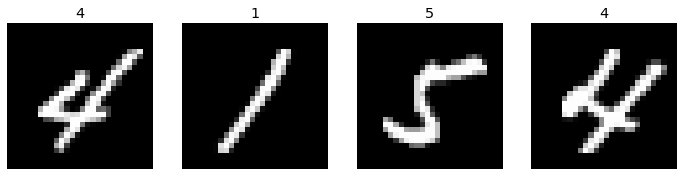

In [6]:
# show a batch of training data
dls.train.show_batch(max_n=4, nrows=1)


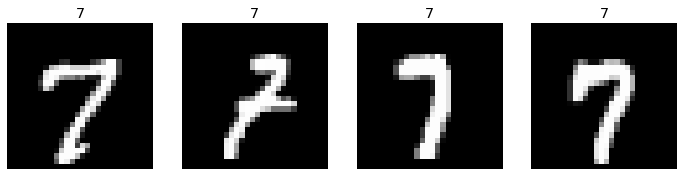

In [7]:
# show a batch of validation data
dls.valid.show_batch(max_n=4, nrows=1)

In [8]:
# take a look at one of the test images
img_files = get_image_files(path/"testing")
img = PILImage.create(img_files[7000])
img


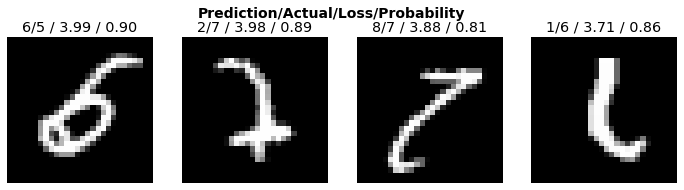

In [9]:
# show the images with the highest loss
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, nrows=1)


In [10]:
# examine the model, including its layers
learn.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 14 x 14   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                      

In [11]:
# select an image from the test set
img = PILImage.create(img_files[0])
img

In [12]:
# apply the trained model to the image
learn.predict(img)

('7',
 tensor(7),
 tensor([0.0091, 0.0108, 0.0102, 0.0099, 0.0098, 0.0087, 0.0098, 0.9142, 0.0095, 0.0081]))

In [13]:
# select a different test set image and apply the model to it to get a prediction
img = PILImage.create(img_files[2030])
img

In [14]:
learn.predict(img)

('5',
 tensor(5),
 tensor([0.0110, 0.0097, 0.0090, 0.0121, 0.0095, 0.8993, 0.0115, 0.0103, 0.0120, 0.0155]))

In [15]:
# select a different image and apply the model to it to get a prediction
img = PILImage.create(img_files[5800])
img

In [16]:
learn.predict(img)

('3',
 tensor(3),
 tensor([0.0090, 0.0104, 0.0088, 0.9096, 0.0105, 0.0163, 0.0093, 0.0083, 0.0073, 0.0104]))